In [2]:
!python download_data.py

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1KzyZzgI1Wj7msuy6_qUU2mSXd50zwUtH
From (redirected): https://drive.google.com/uc?export=download&id=1KzyZzgI1Wj7msuy6_qUU2mSXd50zwUtH&confirm=t&uuid=2b8e30a6-c6d8-4c16-ab4c-c7aba3e52a63
To: /content/data/dataset_large.zip
100% 530M/530M [00:10<00:00, 50.4MB/s]


## Main file

In [3]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

## Data preprocessing

In [4]:
import torch
from data_preprocessing import load_and_preprocess_data
import pytorch_lightning as pl


# Load and preprocess data
raw_behaviour, news, ind2user, user2ind, ind2item, item2ind = load_and_preprocess_data(behaviour_filepath= 'data/behaviors.tsv',
                                                                                       news_filepath= 'data/news.tsv')

raw_behaviour.head()



Data loaded


,impressionId,userId,timestamp,click_history,impressions,userIdx,epochhrs,click_history_idx,noclicks,click
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...,1,437052.0,"[24018, 53861, 36134, 32226, 3059, 52544, 7457...","[86878, 77375, 87020, 68211, 8124, 94340, 1005...",100379
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...,2,437102.0,"[19682, 59798, 47763, 22528, 28586, 34715, 104...","[77845, 87006, 82264, 99591, 78104, 36064, 910...",100906
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1,3,437123.0,"[27031, 12056, 30994, 67619, 52596, 37786, 584...","[93501, 89098, 81570]",76298
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...,4,437100.0,"[18053, 50998, 10851, 75036, 59230, 57479, 681...","[77309, 99709, 44, 97315, 90953, 90311, 100237...",90533
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...,5,437156.0,"[3821, 48343, 42525, 53747, 20654, 42274, 2429...","[80451, 86062, 78691, 78392, 36790, 82441, 783...",81528


In [5]:
news.head()

,itemId,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


## EDA

In [9]:
from eda import plot_category_distribution

plot_category_distribution(news)

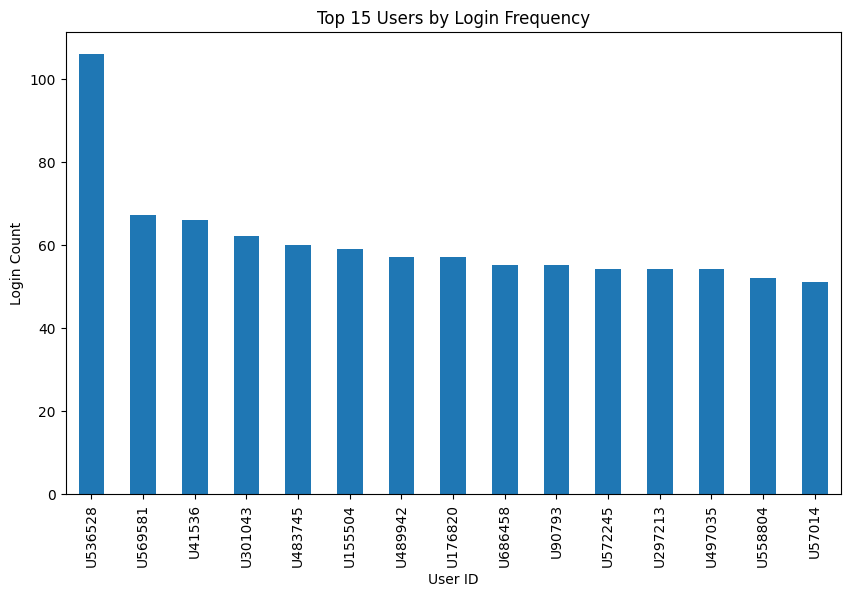

In [10]:
from eda import plot_user_login_histogram

plot_user_login_histogram(raw_behaviour)

In [11]:
raw_behaviour['noclick'] = raw_behaviour['noclicks'].map(lambda x : x[0])
behaviour = raw_behaviour[['epochhrs','userIdx','click_history_idx','noclick','click']]
behaviour.head()

,epochhrs,userIdx,click_history_idx,noclick,click
0,437052.0,1,"[24018, 53861, 36134, 32226, 3059, 52544, 7457...",86878,100379
1,437102.0,2,"[19682, 59798, 47763, 22528, 28586, 34715, 104...",77845,100906
2,437123.0,3,"[27031, 12056, 30994, 67619, 52596, 37786, 584...",93501,76298
3,437100.0,4,"[18053, 50998, 10851, 75036, 59230, 57479, 681...",77309,90533
4,437156.0,5,"[3821, 48343, 42525, 53747, 20654, 42274, 2429...",80451,81528


## Train test and validation split

In [12]:
# Let us use the last 10 % of the data as our validation data:
test_time_th = behaviour['epochhrs'].quantile(0.9)
train = behaviour[behaviour['epochhrs']< test_time_th]
valid =  behaviour[behaviour['epochhrs']>= test_time_th]

In [13]:
from train import dataloader
train_loader, valid_loader = dataloader(train, valid)

## Training our model

In [14]:
from pytorch_lightning.loggers import TensorBoardLogger
from model import NewsMF
logger = TensorBoardLogger("tb_logs", name="my_model")

# Train the model
mf_model = NewsMF(num_users=len(ind2user)+1, num_items = len(ind2item)+1)
trainer = pl.Trainer(max_epochs=10, accelerator="gpu",logger=logger)
trainer.fit(model=mf_model, train_dataloaders=train_loader, val_dataloaders=valid_loader)



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params
--------------------------------------
0 | useremb | Embedding | 7.1 M 
1 | itememb | Embedding | 1.0 M 
--------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.510    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


## Generating recommendations using our model

In [15]:
from utils import generate_recommendations
import pandas as pd
users, recommendations = generate_recommendations(ind2item, ind2user, mf_model, news, 5)
table_of_user_recommendations = pd.DataFrame(users, columns= ['User_ID'])
table_of_user_recommendations['Recommendations'] = recommendations
pd.set_option("max_colwidth", None)
table_of_user_recommendations

,User_ID,Recommendations
0,U87243,"[N96310, N66195, N102672, N98023, N49146]"
1,U598644,"[N23206, N86123, N84928, N65765, N34160]"
2,U532401,"[N73802, N65349, N114510, N68031, N39100]"
3,U593596,"[N121255, N24929, N72531, N63675, N105843]"
4,U239687,"[N62233, N1794, N11600, N12558, N16233]"
5,U521853,"[N2497, N118977, N2444, N106577, N62157]"
6,U687515,"[N17240, N89682, N63711, N97693, N29453]"
7,U192112,"[N51062, N91580, N1281, N95157, N42732]"
8,U530668,"[N33277, N126379, N48207, N103483, N101885]"
9,U290933,"[N126530, N43895, N102044, N29168, N7210]"


## Evaluating for user = U87243

In [16]:
from utils import mean_reciprocal_rank, discounted_cumulative_gain, Normalised_dcg

recommendations_for_user = recommendations[0]
recommendations_for_user

array(['N96310', 'N66195', 'N102672', 'N98023', 'N49146'], dtype=object)

In [18]:
## Assuming the user clicks on the 2nd article recommended to him
print(f"The MRR for the user is: {mean_reciprocal_rank(list(recommendations_for_user))}")
print(f"The DCG for the user is: {discounted_cumulative_gain(list(recommendations_for_user))}")
print(f"The NDCG for the user is: {Normalised_dcg(list(recommendations_for_user))}")

The MRR for the user is: 0.5
The DCG for the user is: 0.6309297535714575
The NDCG for the user is: 0.6309297535714575
